In [70]:
# Importing requests to extract content from a url
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from wordcloud import WordCloud, STOPWORDS

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
tweets = pd.read_csv('Elon_musk.csv')
tweets.drop(['Unnamed: 0'],inplace=True, axis=1)
tweets

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [18]:
tweets=[Text.strip() for Text in tweets.Text]
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [19]:
type(tweets)

list

In [22]:
#joining
tweets_text =' '.join(tweets)
#tweets_text

In [24]:
## remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
#print(tweets_tokens)

In [34]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
#tweets_tokens_text

In [35]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
#no_punc_text

In [37]:
# remove https or url within text
no_url_text=re.sub(r'http\S+', '', no_punc_text)
#no_url_text

In [43]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
#print(text_tokens)

In [44]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [45]:
# Tokens count
len(text_tokens)

18357

In [47]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
#print(no_stop_tokens)

In [53]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
#print(lower_words[100:200])

In [54]:
# Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
#print(stemmed_tokens[100:200])

In [55]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
#print(doc)

In [57]:
lemmas=[token.lemma_ for token in doc]
#print(lemmas)

In [59]:
clean_tweets=' '.join(lemmas)
#clean_tweets

## Feature Extaction
## 1. Using CountVectorizer


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)


{'alien': 194, 'ray': 2355, 'trace': 3020, 'cyberpunk': 768, 'hdr': 1359, 'nextlevel': 1962, 'have': 1354, 'try': 3051, 'great': 1306, 'interview': 1558, 'doge': 891, 'underestimate': 3183, 'congratulation': 674, 'tesla': 2928, 'china': 583, 'amazing': 217, 'execution': 1057, 'last': 1642, 'year': 3399, 'now': 1991, 'next': 1961, 'even': 1030, 'happy': 1341, 'new': 1959, 'ox': 2093, 'frodo': 1207, 'underdoge': 3182, 'all': 196, 'thought': 2963, 'would': 3385, 'fail': 1091, 'himself': 1402, 'haha': 1329, 'thank': 2937, 'indeed': 1499, 'tweet': 3065, 'definitely': 805, 'represent': 2423, 'realworld': 2371, 'time': 2979, 'allocation': 198, 'the': 2942, 'entertaining': 1000, 'outcome': 2072, 'likely': 1696, 'just': 1600, 'send': 2567, 'agree': 179, 'clubhouse': 612, 'it': 1577, 'get': 1265, 'real': 2366, 'buy': 502, 'dogecoin': 893, 'lil': 1697, 'toddler': 2990, 'hodler': 1408, 'he': 1360, 'issue': 1576, 'sentencing': 2572, 'seem': 2559, 'bit': 419, 'high': 1394, 'fix': 1154, 'please': 218

In [62]:
print(cv.get_feature_names()[100:200])


['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all', 'allocati', 'allocati

In [63]:
print(tweetscv.toarray()[100:200])
print(tweetscv.toarray().shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(12295, 3418)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [64]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [65]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'life', 'like', 'look', 'lot', 'love', 'make', 'many', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 3. TF-IDF Vectorizer

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [67]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())


['10', '100', '13', '20', '2020', '30', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'cast', 'catch', 'cell', 'ch4', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock'

## Generate Word Cloud

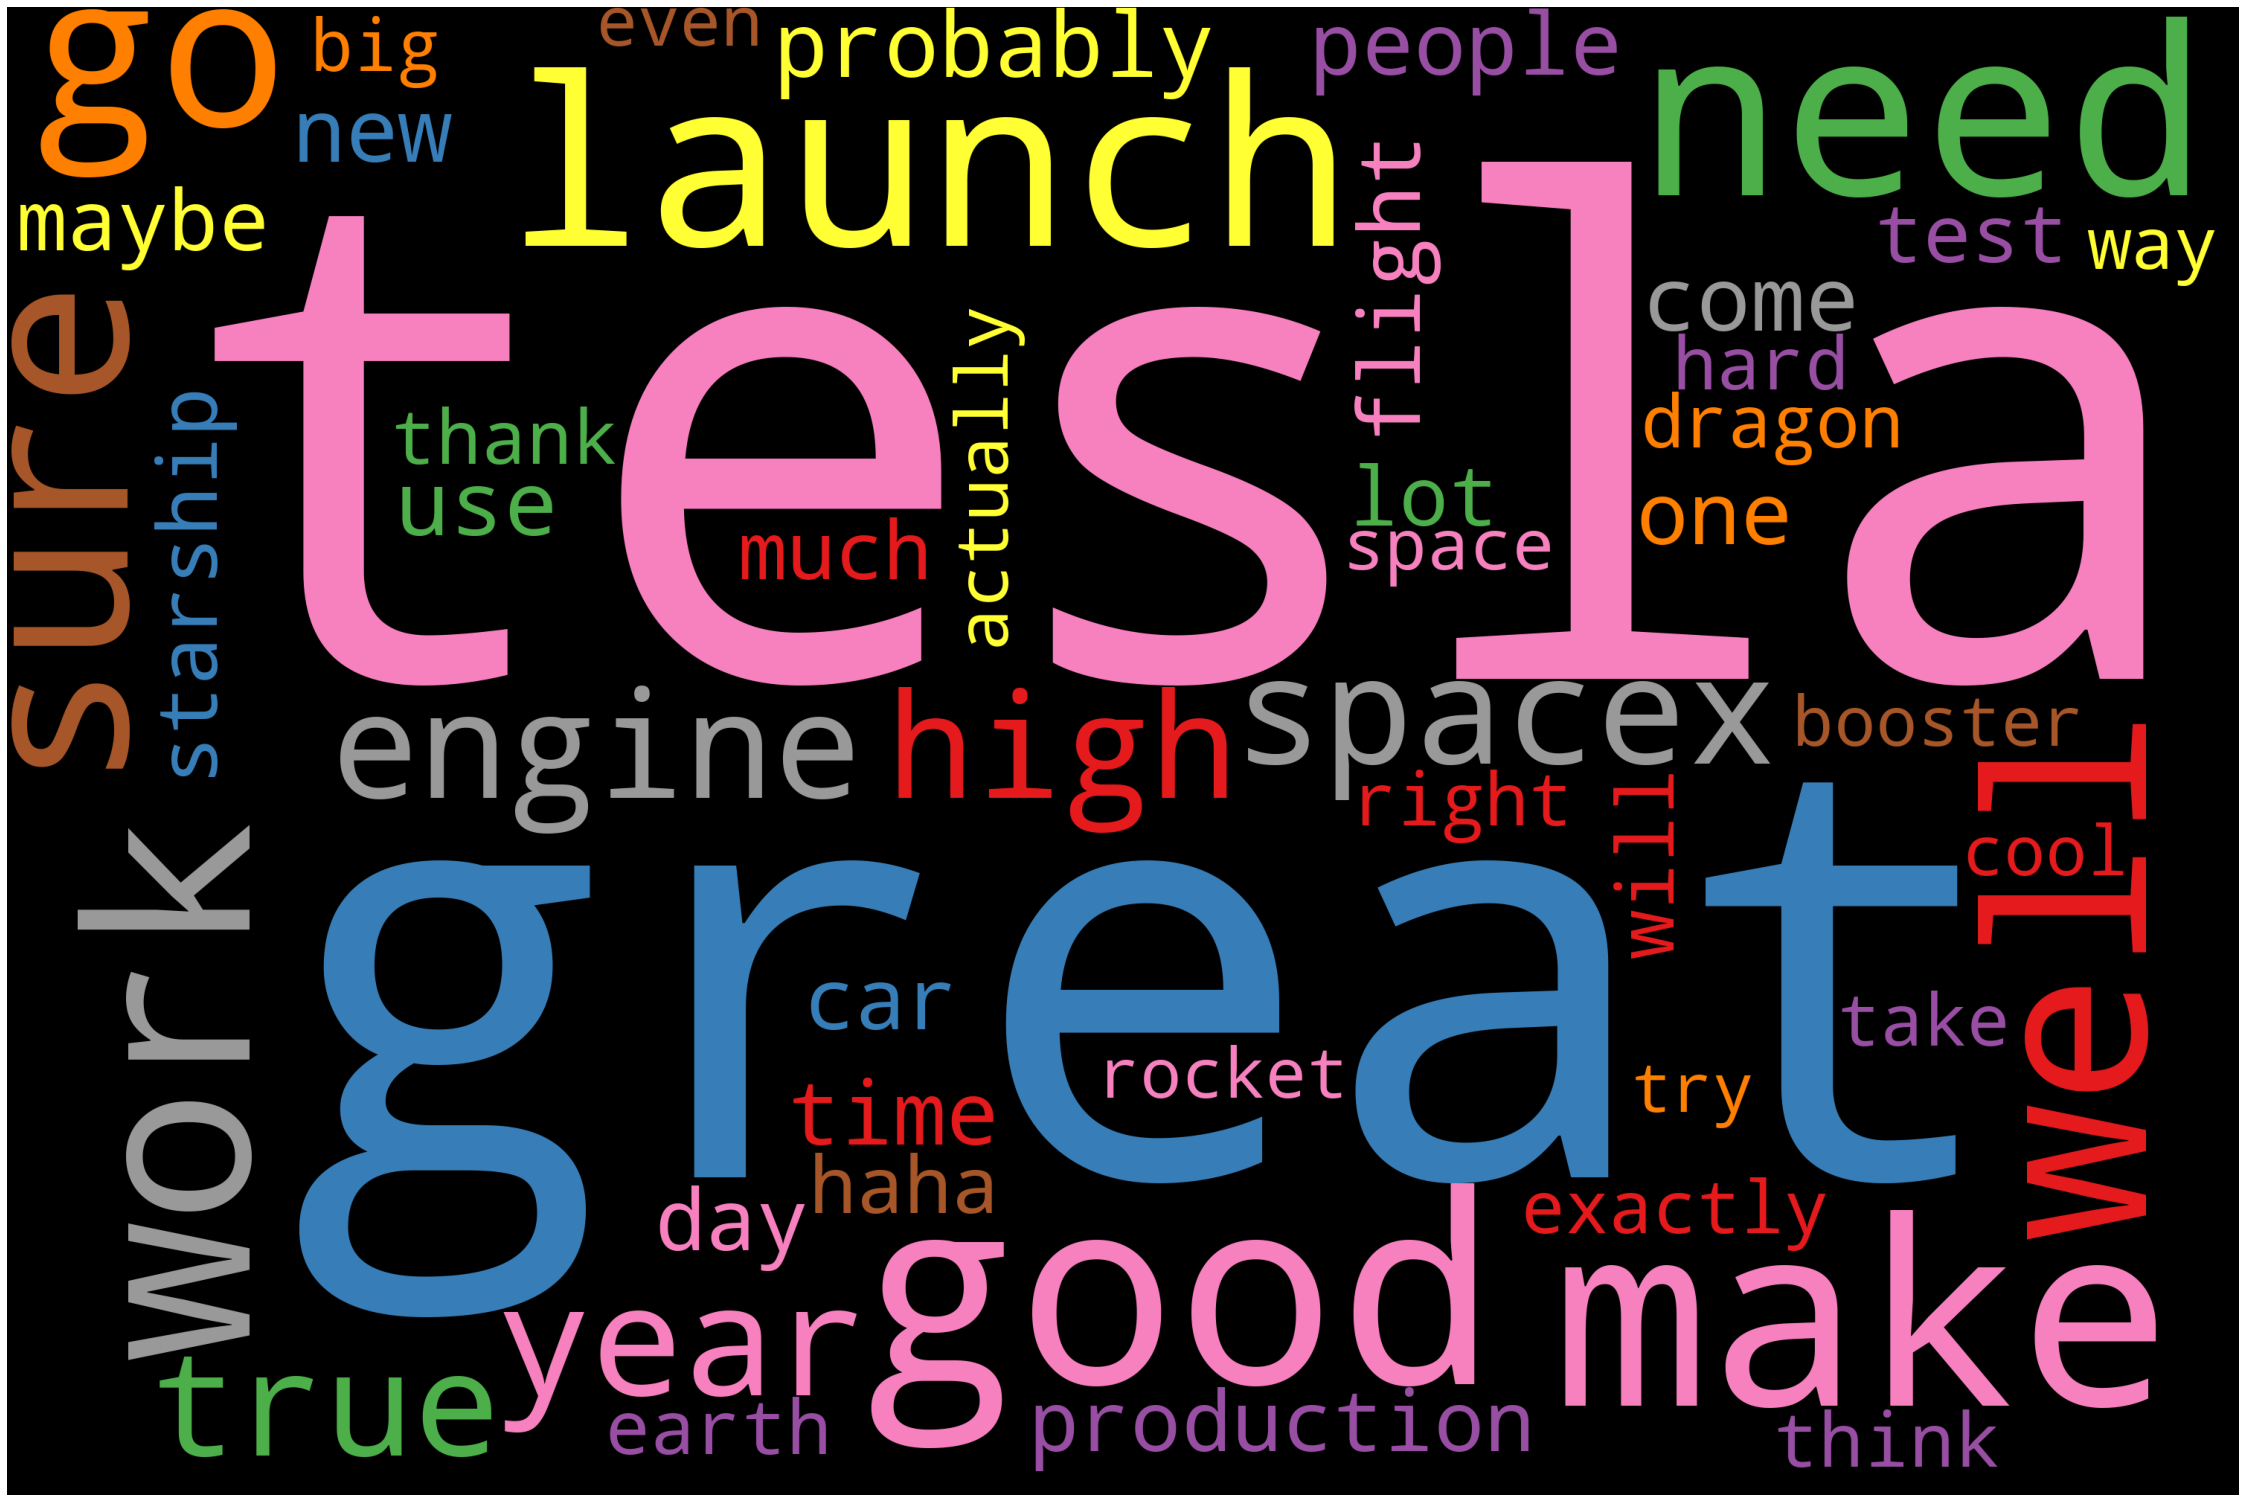

In [71]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [72]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [73]:
for token in doc_block[100:200]:
    print(token,token.pos_)    

together ADV
one NUM
mission NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo NOUN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
� PROPN
spacex VERB
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
� VERB
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g NOUN
� VERB
it PRON
� VERB
mean ADJ
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend ADJ
earth NOUN
may AUX
idea VERB
apply VERB
mars PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m VERB
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla ADV
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
� PROPN
� PROPN
miss VERB
back ADP
work NOUN
go VERB
� PROPN
do AUX
seem VERB
bit ADV
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully 

In [74]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])


['appear', 'fix', 'coin', 'unit', 'time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', '�', '�', 'video', 'people', 'speak', 'cute', 'image', '�', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'come', '�', '�', 'fun', 'crypto', 'simplicity', 'genius', 'yup', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'spacex', 'read', '�', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'yolt', 'thing', 'restaurant', 'get', 'hang', 'stranger', 'sjm', 'currency', 'earth', 'scratch', 'u0001f5a4', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'turbopumpfed', 'raptor', 'mu', 'rt', 'falcon', 'launch', '�', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'falcon', 'launch']


In [75]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,make,64
1,launch,62
2,tesla,62
3,year,49
4,work,49
5,need,49
6,rt,44
7,go,43
8,come,40
9,time,37


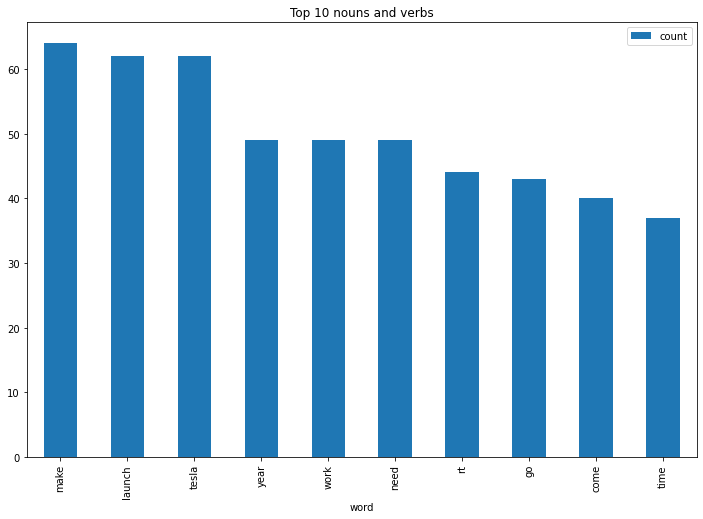

In [76]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [78]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences


['@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [122]:
import numpy as np
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [119]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [120]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores


{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [123]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [124]:
# manual testing
calculate_sentiment(text='great')

3

In [125]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
909    0
910   -4
911    0
912   -2
913    0
Name: sentiment_value, Length: 914, dtype: int64

In [126]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
909    11
910    31
911     3
912    47
913    15
Name: word_count, Length: 914, dtype: int64

In [127]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
828,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
473,"He plays the �poor inventor� card, but was ric...",-5,34
910,"It may never pay out, as the stock can�t b� ht...",-4,31
...,...,...,...
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
710,We just haven�t observed the� https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [128]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.374179
std        2.704916
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [129]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11
910,"It may never pay out, as the stock can�t b� ht...",-4,31
911,Details Aug 28.,0,3
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [130]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,7,109
17,Back to work I go � @CapybaraSurfer @MattWalla...,4,39
...,...,...,...
901,He was one of the very best.,3,7
903,"@Ali_Afshari In general, we need to improve ho...",4,87
905,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
907,This is both great &amp; terrifying.,3,6


In [131]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...",0,11,909
910,"It may never pay out, as the stock can�t b� ht...",-4,31,910
911,Details Aug 28.,0,3,911
912,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,912


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

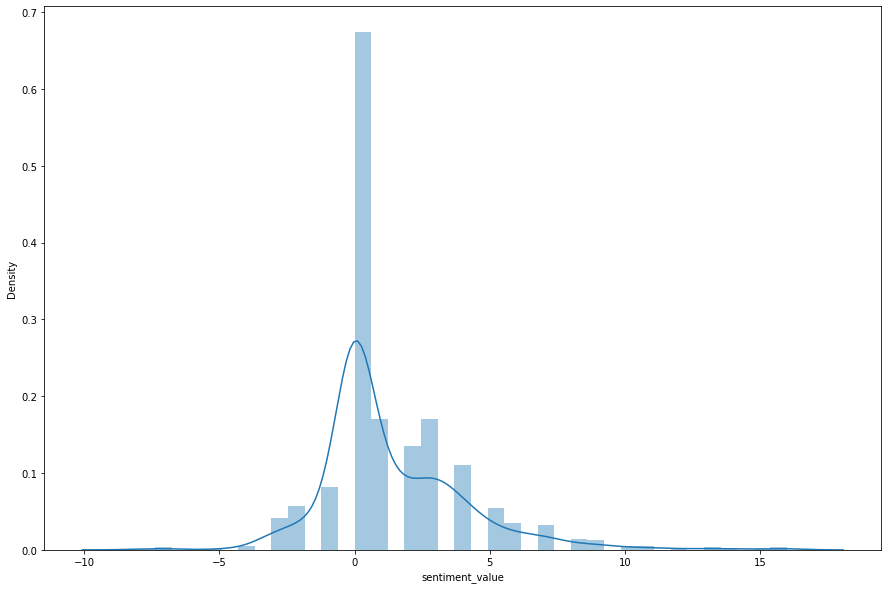

In [132]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

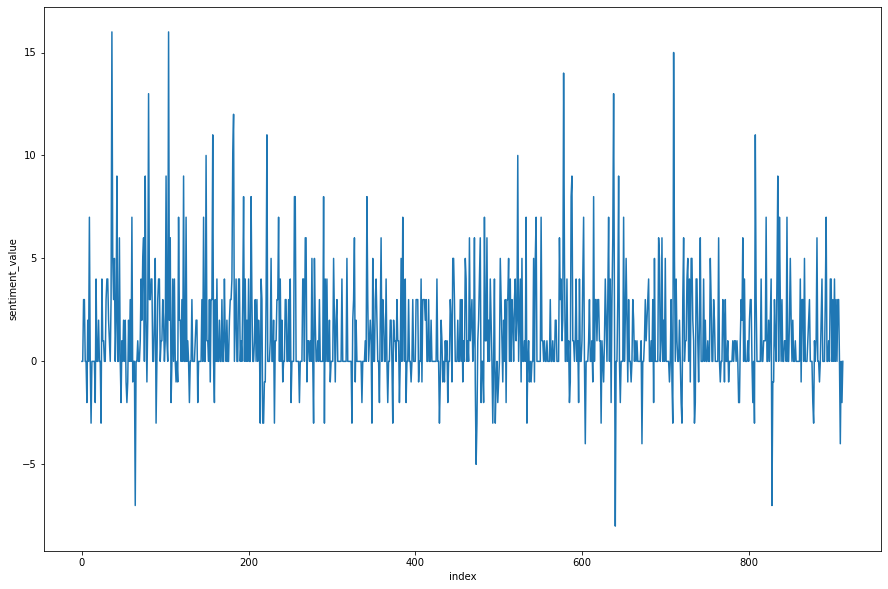

In [133]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

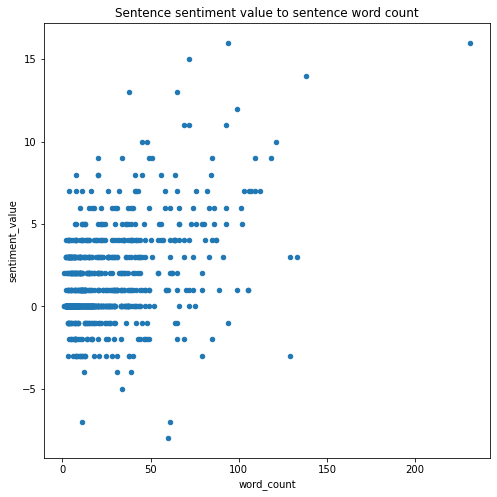

In [134]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')